In [41]:
import pandas as pd
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline


In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
train

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_basement,yr_built,yr_renovated,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,3876500290,175000.0,3,1.00,1070,6164,0.0,0.0,1967,0.0,...,0,0,0,0,0,0,0,0,0,0
1,3630200520,775000.0,4,2.50,2580,5787,0.0,0.0,2007,0.0,...,0,0,0,0,0,0,0,0,0,0
2,8079010220,440000.0,4,2.50,2350,7203,0.0,0.0,1989,0.0,...,0,0,0,0,0,0,0,0,0,0
3,5093300280,1680000.0,5,5.25,4830,18707,0.0,900.0,1952,1998.0,...,0,0,0,0,0,0,0,0,0,0
4,125069038,2140000.0,4,3.75,5150,453895,0.0,790.0,1997,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16192,7524000030,250000.0,3,2.00,1440,9220,0.0,0.0,1965,0.0,...,0,0,0,0,0,0,0,0,1,0
16193,603000926,380000.0,5,3.50,2420,4670,0.0,0.0,2013,0.0,...,0,0,0,0,0,0,0,0,0,0
16194,1446800660,276500.0,4,1.75,1400,6650,0.0,0.0,1942,0.0,...,0,0,0,0,1,0,0,0,0,0
16195,4400900030,440000.0,4,2.75,2340,11034,0.0,620.0,1967,0.0,...,0,0,1,0,0,0,0,0,0,0


In [4]:
test

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_basement,yr_built,yr_renovated,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,3905081350,560000.0,4,2.75,1950,6192,0.0,0.0,1992,0.0,...,0,0,0,0,0,0,0,0,0,0
1,6713700250,500000.0,5,3.00,2920,11440,0.0,0.0,2003,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3363900155,470000.0,2,1.00,1220,4000,0.0,0.0,1908,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4217400680,1020000.0,4,3.00,2720,4800,0.0,930.0,1928,0.0,...,0,0,0,0,0,0,0,0,0,0
4,7301300050,375000.0,3,2.50,1930,6180,0.0,600.0,1961,0.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5395,1266200140,1850000.0,4,3.25,4160,10335,0.0,0.0,2014,0.0,...,0,0,0,0,0,0,0,0,0,0
5396,3333000775,249900.0,3,1.00,1100,5000,0.0,0.0,1960,0.0,...,0,0,0,0,0,0,0,0,0,0
5397,4459800070,679000.0,4,1.50,1420,4923,0.0,0.0,1928,0.0,...,0,0,0,0,0,0,0,0,0,0
5398,7212680080,300000.0,3,1.75,1700,8481,0.0,0.0,1993,0.0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
def get_model_data(model, is_log_transformed = False):
    
    train_r2, train_r2_adj = model.rsquared, model.rsquared_adj

    y_hat_train = model.predict(train.drop(['price'], axis=1))
    y_train = train['price']
    if is_log_transformed:
        train_rmse = np.sqrt(mean_squared_error(np.exp(y_train), np.exp(y_hat_train)))
    else:
        train_rmse = np.sqrt(mean_squared_error(y_train, y_hat_train))
        
    y_hat_test = model.predict(test.drop(['price'], axis=1))
    y_test = test['price']
    if is_log_transformed:
        test_rmse = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_hat_test)))
    else:
        test_rmse = np.sqrt(mean_squared_error(y_test, y_hat_test))

    pvalues = model.pvalues.to_dict()
    significant_items = {}
    for key, value in pvalues.items():
        if value < 0.05:
            significant_items[key] = value
        
    print('r-sqr =', train_r2)
    print('r-sqrd-adjusted =', train_r2_adj)
    print('Train rmse =', train_rmse)
    print('Test rmse =', test_rmse)
    print('number of significant features =', len(significant_items))
    
    sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

In [6]:
train.drop(['id', 'yr_built', 'yr_renovated', 'yr_sold', 'yr_since_renovation'] , axis=1, inplace=True)
test.drop(['id', 'yr_built', 'yr_renovated', 'yr_sold', 'yr_since_renovation'] , axis=1, inplace=True)

r-sqr = 0.8189229383789511
r-sqrd-adjusted = 0.8178205932404953
Train rmse = 157985.9801235905
Test rmse = 140609.21109535126
number of significant features = 78


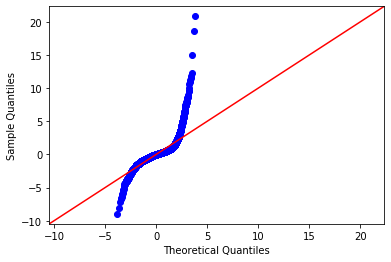

In [7]:
predictors = '+'.join(train.columns[1:])
formula = 'price' + '~' + predictors
model = ols(formula=formula, data=train).fit()
get_model_data(model)

In [8]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     742.9
Date:                Thu, 19 Nov 2020   Prob (F-statistic):               0.00
Time:                        10:48:53   Log-Likelihood:            -2.1686e+05
No. Observations:               16197   AIC:                         4.339e+05
Df Residuals:                   16098   BIC:                         4.347e+05
Df Model:                          98                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -3.574e+07   6.99e+06     -5.116      0.000   -4.94e+07    -2.2e+07
bedrooms       -1.545e+04   1766.421     -8.747      0.000   -1.89e+04    -1.2e+04
bathrooms       2.659e+04   3012.652      8.827      0.000    2.07e+04    3.25e+04
sqft_living      178.4171      3.356     53.160      0.000     171.839     184.996
sqft_lot           0.1797      0.036      4.934      0.000       0.108       0.251
waterfront      8.177e+05   1.59e+04     51.542      0.000    7.87e+05    8.49e+05
sqft_basement    -40.2472      4.180     -9.629      0.000     -48.440     -32.054
lat             1.761e+05   7.24e+04      2.433      0.015    3.42e+04    3.18e+05
long           -2.247e+05   5.17e+04     -4.342      0.000   -3.26e+05   -1.23e+05
yr_since_built   548.1915     79.232      6.919      0.000     392.887     703.496
renovated       6.056e+04   7335.483      8.255      0.000    4.62e+04    7.49e+04
floors_15      -1.096e+04   5029.266     -2.180      0.029   -2.08e+04   -1104.455
floors_20      -3.051e+04   4224.349     -7.221      0.000   -3.88e+04   -2.22e+04
floors_25       3.169e+04   1.57e+04      2.013      0.044     838.311    6.25e+04
floors_30      -6.149e+04   9504.486     -6.470      0.000   -8.01e+04   -4.29e+04
floors_35      -2189.9250   6.51e+04     -0.034      0.973    -1.3e+05    1.25e+05
condition_2     8.158e+04   4.01e+04      2.034      0.042    2958.620     1.6e+05
condition_3     9.424e+04   3.78e+04      2.494      0.013    2.02e+04    1.68e+05
condition_4     1.189e+05   3.78e+04      3.146      0.002    4.48e+04    1.93e+05
condition_5     1.537e+05    3.8e+04      4.046      0.000    7.92e+04    2.28e+05
grade_11        2.034e+05   1.08e+04     18.808      0.000    1.82e+05    2.25e+05
grade_12        6.429e+05    2.1e+04     30.643      0.000    6.02e+05    6.84e+05
grade_13         1.81e+06    5.2e+04     34.795      0.000    1.71e+06    1.91e+06
grade_3        -1.126e+05   1.59e+05     -0.707      0.480   -4.25e+05       2e+05
grade_4        -2.087e+05   3.62e+04     -5.768      0.000    -2.8e+05   -1.38e+05
grade_5        -2.454e+05   1.56e+04    -15.684      0.000   -2.76e+05   -2.15e+05
grade_6        -2.522e+05   9577.239    -26.329      0.000   -2.71e+05   -2.33e+05
grade_7        -2.442e+05   7841.961    -31.134      0.000    -2.6e+05   -2.29e+05
grade_8        -2.094e+05   7039.418    -29.745      0.000   -2.23e+05   -1.96e+05
grade_9        -1.258e+05   6826.771    -18.429      0.000   -1.39e+05   -1.12e+05
zipcode_98002   1.553e+04   1.65e+04      0.939      0.348   -1.69e+04    4.79e+04
zipcode_98003  -1.639e+04   1.46e+04     -1.123      0.261    -4.5e+04    1.22e+04
zipcode_98004   7.276e+05    2.7e+04     26.976      0.000    6.75e+05     7.8e+05
zipcode_98005   2.561e+05   2.87e+04      8.908      0.000       2e+05    3.12e+05
zipcode_9800

In [9]:
# removing values outside three times the standard diviation
mean = 5.402966e+05
std = 3.673681e+05

upper_cutoff = mean + (3*std)
lower_cutoff = mean - (3*std)

In [10]:
train = train[(train['price'] < upper_cutoff) & (train['price'] > lower_cutoff)]
test = test[(test['price'] < upper_cutoff) & (test['price'] > lower_cutoff)]

r-sqr = 0.8263781009104864
r-sqrd-adjusted = 0.8253117893863834
Train rmse = 107820.68718830912
Test rmse = 105106.82624231857
number of significant features = 82


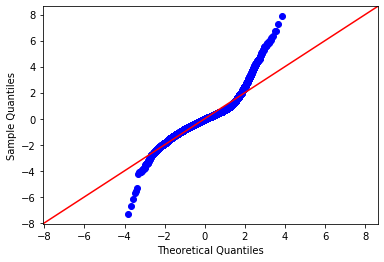

In [11]:
predictors = '+'.join(train.columns[1:])
formula = 'price' + '~' + predictors
model = ols(formula=formula, data=train).fit()
get_model_data(model)

The model looks a lot better after dropping values outside three times the standard deviation. However, now we only have data within three times the standard deviation to work with.

Upper value = 1,642,400

In [12]:
train.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_basement', 'lat', 'long', 'yr_since_built',
       'renovated', 'floors_15', 'floors_20', 'floors_25', 'floors_30',
       'floors_35', 'condition_2', 'condition_3', 'condition_4', 'condition_5',
       'grade_11', 'grade_12', 'grade_13', 'grade_3', 'grade_4', 'grade_5',
       'grade_6', 'grade_7', 'grade_8', 'grade_9', 'zipcode_98002',
       'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006',
       'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011',
       'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 'zipcode_98023',
       'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029',
       'zipcode_98030', 'zipcode_98031', 'zipcode_98032', 'zipcode_98033',
       'zipcode_98034', 'zipcode_98038', 'zipcode_98039', 'zipcode_98040',
       'zipcode_98042', 'zipcode_98045', 'zipcode_98052', 'zipcode_98053',
       'zipcode_98055', 'zipcode_98056',

# Transforming

In [13]:
continuous = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']
for col in continuous:
    train[col] = train[col].map(np.log)
    test[col] = test[col].map(np.log)

C:\Users\khan_\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\khan_\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [14]:
train

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_basement,lat,long,yr_since_built,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,12.072541,1.098612,0.000000,6.975414,8.726481,0.0,0.0,47.3377,-122.291,48,...,0,0,0,0,0,0,0,0,0,0
1,13.560618,1.386294,0.916291,7.855545,8.663369,0.0,0.0,47.5416,-121.994,8,...,0,0,0,0,0,0,0,0,0,0
2,12.994530,1.386294,0.916291,7.762171,8.882253,0.0,0.0,47.5123,-122.151,25,...,0,0,0,0,0,0,0,0,0,0
5,13.345507,1.098612,0.000000,6.927558,8.942461,0.0,0.0,47.6795,-122.202,96,...,0,0,0,0,0,0,0,0,0,0
6,13.217674,1.098612,0.916291,7.979339,12.040301,0.0,0.0,47.2492,-121.975,24,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16192,12.429216,1.098612,0.693147,7.272398,9.129130,0.0,0.0,47.3702,-122.317,49,...,0,0,0,0,0,0,0,0,1,0
16193,12.847927,1.609438,1.252763,7.791523,8.448914,0.0,0.0,47.5241,-122.285,1,...,0,0,0,0,0,0,0,0,0,0
16194,12.529966,1.386294,0.559616,7.244228,8.802372,0.0,0.0,47.4888,-122.332,73,...,0,0,0,0,1,0,0,0,0,0
16195,12.994530,1.386294,1.011601,7.757906,9.308737,0.0,620.0,47.7686,-122.278,47,...,0,0,1,0,0,0,0,0,0,0


r-sqr = 0.856656770443301
r-sqrd-adjusted = 0.8557764175708811
Train rmse = 103018.10407883715
Test rmse = 99717.35070789381
number of significant features = 90


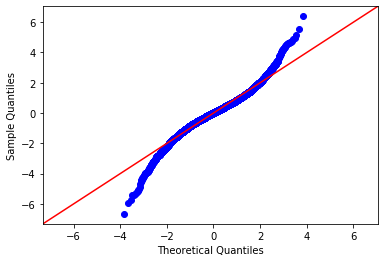

In [15]:
predictors = '+'.join(train.columns[1:])
formula = 'price' + '~' + predictors
model = ols(formula=formula, data=train).fit()
get_model_data(model, True)

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     973.1
Date:                Thu, 19 Nov 2020   Prob (F-statistic):               0.00
Time:                        10:48:59   Log-Likelihood:                 4487.2
No. Observations:               15892   AIC:                            -8778.
Df Residuals:                   15794   BIC:                            -8026.
Df Model:                          97                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -83.5491      8.174    -10.222      0.000     -99.571     -67.527
bedrooms          -0.0570      0.007     -7.935      0.000      -0.071      -0.043
bathrooms          0.0627      0.007      9.081      0.000       0.049       0.076
sqft_living        0.4850      0.009     55.750      0.000       0.468       0.502
sqft_lot           0.0664      0.002     26.819      0.000       0.062       0.071
waterfront         0.6014      0.025     24.412      0.000       0.553       0.650
sqft_basement  -5.459e-05   4.98e-06    -10.955      0.000   -6.44e-05   -4.48e-05
lat                0.5915      0.084      7.023      0.000       0.426       0.757
long              -0.5218      0.060     -8.628      0.000      -0.640      -0.403
yr_since_built     0.0004   9.57e-05      4.101      0.000       0.000       0.001
renovated          0.0627      0.009      7.162      0.000       0.046       0.080
floors_15          0.0142      0.006      2.382      0.017       0.003       0.026
floors_20         -0.0024      0.005     -0.477      0.633      -0.012       0.008
floors_25         -0.0213      0.020     -1.068      0.285      -0.060       0.018
floors_30         -0.0669      0.011     -5.896      0.000      -0.089      -0.045
floors_35         -0.0798      0.082     -0.969      0.333      -0.241       0.082
condition_2        0.1922      0.046      4.146      0.000       0.101       0.283
condition_3        0.3166      0.044      7.253      0.000       0.231       0.402
condition_4        0.3513      0.044      8.046      0.000       0.266       0.437
condition_5        0.4017      0.044      9.155      0.000       0.316       0.488
grade_11           0.1347      0.014      9.611      0.000       0.107       0.162
grade_12           0.1769      0.038      4.628      0.000       0.102       0.252
grade_13        5.486e-15   1.55e-15      3.545      0.000    2.45e-15    8.52e-15
grade_3            0.1019      0.184      0.553      0.580      -0.259       0.463
grade_4           -0.4157      0.042     -9.818      0.000      -0.499      -0.333
grade_5           -0.4603      0.018    -24.889      0.000      -0.497      -0.424
grade_6           -0.4110      0.011    -36.285      0.000      -0.433      -0.389
grade_7           -0.3330      0.009    -37.031      0.000      -0.351      -0.315
grade_8           -0.2208      0.008    -27.260      0.000      -0.237      -0.205
grade_9           -0.0821      0.008    -10.093      0.000      -0.098      -0.066
zipcode_98002      0.0108      0.019      0.564      0.573      -0.027       0.048
zipcode_98003     -0.0019      0.017     -0.115      0.909      -0.035       0.031
zipcode_98004      0.9744      0.032     30.508      0.000       0.912       1.037
zipcode_98005      0.6081      0.033     18.207      0.000       0.543       0.674
zipcode_9800

In [17]:
model_dict = dict(model.pvalues)

high_pvalues= []
for name,pvalue in model_dict.items():
    if pvalue > 0.75:
        high_pvalues.append(name)

high_pvalues 

['zipcode_98003', 'zipcode_98188']

In [18]:
train.drop(high_pvalues, inplace = True, axis = 1)
test.drop(high_pvalues, inplace = True, axis = 1)

C:\Users\khan_\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


r-sqr = 0.8566559672150644
r-sqrd-adjusted = 0.8557938702845397
Train rmse = 103019.56835029049
Test rmse = 99720.60269779405
number of significant features = 90


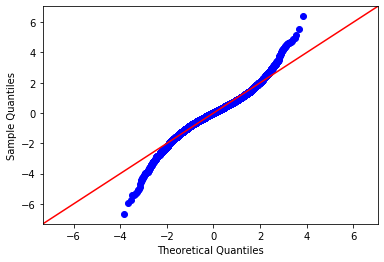

In [19]:
predictors = '+'.join(train.columns[1:])
formula = 'price' + '~' + predictors
model = ols(formula=formula, data=train).fit()
get_model_data(model, True)

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     993.7
Date:                Thu, 19 Nov 2020   Prob (F-statistic):               0.00
Time:                        10:55:54   Log-Likelihood:                 4487.2
No. Observations:               15892   AIC:                            -8782.
Df Residuals:                   15796   BIC:                            -8046.
Df Model:                          95                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -83.8601      7.946    -10.553      0.000     -99.436     -68.285
bedrooms          -0.0570      0.007     -7.932      0.000      -0.071      -0.043
bathrooms          0.0627      0.007      9.081      0.000       0.049       0.076
sqft_living        0.4851      0.009     55.760      0.000       0.468       0.502
sqft_lot           0.0664      0.002     26.825      0.000       0.062       0.071
waterfront         0.6015      0.025     24.418      0.000       0.553       0.650
sqft_basement  -5.458e-05   4.98e-06    -10.955      0.000   -6.43e-05   -4.48e-05
lat                0.6027      0.073      8.256      0.000       0.460       0.746
long              -0.5200      0.060     -8.688      0.000      -0.637      -0.403
yr_since_built     0.0004   9.56e-05      4.111      0.000       0.000       0.001
renovated          0.0627      0.009      7.162      0.000       0.046       0.080
floors_15          0.0142      0.006      2.382      0.017       0.003       0.026
floors_20         -0.0024      0.005     -0.474      0.635      -0.012       0.008
floors_25         -0.0213      0.020     -1.067      0.286      -0.060       0.018
floors_30         -0.0668      0.011     -5.890      0.000      -0.089      -0.045
floors_35         -0.0796      0.082     -0.967      0.334      -0.241       0.082
condition_2        0.1922      0.046      4.148      0.000       0.101       0.283
condition_3        0.3167      0.044      7.257      0.000       0.231       0.402
condition_4        0.3514      0.044      8.049      0.000       0.266       0.437
condition_5        0.4018      0.044      9.158      0.000       0.316       0.488
grade_11           0.1347      0.014      9.609      0.000       0.107       0.162
grade_12           0.1769      0.038      4.629      0.000       0.102       0.252
grade_13        2.286e-15   1.16e-15      1.967      0.049    7.71e-18    4.56e-15
grade_3            0.1019      0.184      0.553      0.580      -0.259       0.463
grade_4           -0.4156      0.042     -9.817      0.000      -0.499      -0.333
grade_5           -0.4603      0.018    -24.896      0.000      -0.497      -0.424
grade_6           -0.4110      0.011    -36.306      0.000      -0.433      -0.389
grade_7           -0.3330      0.009    -37.046      0.000      -0.351      -0.315
grade_8           -0.2208      0.008    -27.264      0.000      -0.237      -0.205
grade_9           -0.0821      0.008    -10.093      0.000      -0.098      -0.066
zipcode_98002      0.0107      0.018      0.609      0.542      -0.024       0.045
zipcode_98004      0.9709      0.027     36.551      0.000       0.919       1.023
zipcode_98005      0.6046      0.028     21.270      0.000       0.549       0.660
zipcode_98006      0.5881      0.023     26.089      0.000       0.544       0.632
zipcode_9800

# Cross Validation

In [27]:
from sklearn.base import BaseEstimator, RegressorMixin
import statsmodels.formula.api as smf
import statsmodels.api as sm
 
class statsmodel(BaseEstimator, RegressorMixin):
    def __init__(self, sm_class, formula):
        self.sm_class = sm_class
        self.formula = formula
        self.model = None
        self.result = None
 
    def fit(self,data,dummy):
        self.model = self.sm_class(self.formula,data)
        self.result = self.model.fit()
 
    def predict(self,X):
        return self.result.predict(X)

In [29]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
 
# Get data
# ccard = sm.datasets.ccard.load_pandas()
# print (ccard.data.head())
 
# create a model
clf = statsmodel(smf.ols, "AVGEXP ~ AGE + INCOME")
 
# Print cross val score on this model
print (cross_val_score(clf, ccard.data, ccard.data['AVGEXP']))
 
# Same thing on sklearn's linear regression model
lm = linear_model.LinearRegression()
 
print (cross_val_score(lm , ccard.data.iloc[:,1:3].values, ccard.data.iloc[:,0].values))


[ 0.12568414  0.0765437  -0.92486306]
[ 0.12568414  0.0765437  -0.92486306]


C:\Users\khan_\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\khan_\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


# Residual Plots

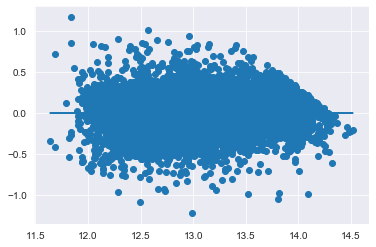

In [42]:
plt.scatter(model.predict(train.drop('price', axis = 1)), model.resid)
plt.plot(model.predict(train.drop('price', axis = 1)), [0 for i in range(len(train))])

In [43]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     993.7
Date:                Thu, 19 Nov 2020   Prob (F-statistic):               0.00
Time:                        11:30:25   Log-Likelihood:                 4487.2
No. Observations:               15892   AIC:                            -8782.
Df Residuals:                   15796   BIC:                            -8046.
Df Model:                          95                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -83.8601      7.946    -10.553      0.000     -99.436     -68.285
bedrooms          -0.0570      0.007     -7.932      0.000      -0.071      -0.043
bathrooms          0.0627      0.007      9.081      0.000       0.049       0.076
sqft_living        0.4851      0.009     55.760      0.000       0.468       0.502
sqft_lot           0.0664      0.002     26.825      0.000       0.062       0.071
waterfront         0.6015      0.025     24.418      0.000       0.553       0.650
sqft_basement  -5.458e-05   4.98e-06    -10.955      0.000   -6.43e-05   -4.48e-05
lat                0.6027      0.073      8.256      0.000       0.460       0.746
long              -0.5200      0.060     -8.688      0.000      -0.637      -0.403
yr_since_built     0.0004   9.56e-05      4.111      0.000       0.000       0.001
renovated          0.0627      0.009      7.162      0.000       0.046       0.080
floors_15          0.0142      0.006      2.382      0.017       0.003       0.026
floors_20         -0.0024      0.005     -0.474      0.635      -0.012       0.008
floors_25         -0.0213      0.020     -1.067      0.286      -0.060       0.018
floors_30         -0.0668      0.011     -5.890      0.000      -0.089      -0.045
floors_35         -0.0796      0.082     -0.967      0.334      -0.241       0.082
condition_2        0.1922      0.046      4.148      0.000       0.101       0.283
condition_3        0.3167      0.044      7.257      0.000       0.231       0.402
condition_4        0.3514      0.044      8.049      0.000       0.266       0.437
condition_5        0.4018      0.044      9.158      0.000       0.316       0.488
grade_11           0.1347      0.014      9.609      0.000       0.107       0.162
grade_12           0.1769      0.038      4.629      0.000       0.102       0.252
grade_13        2.286e-15   1.16e-15      1.967      0.049    7.71e-18    4.56e-15
grade_3            0.1019      0.184      0.553      0.580      -0.259       0.463
grade_4           -0.4156      0.042     -9.817      0.000      -0.499      -0.333
grade_5           -0.4603      0.018    -24.896      0.000      -0.497      -0.424
grade_6           -0.4110      0.011    -36.306      0.000      -0.433      -0.389
grade_7           -0.3330      0.009    -37.046      0.000      -0.351      -0.315
grade_8           -0.2208      0.008    -27.264      0.000      -0.237      -0.205
grade_9           -0.0821      0.008    -10.093      0.000      -0.098      -0.066
zipcode_98002      0.0107      0.018      0.609      0.542      -0.024       0.045
zipcode_98004      0.9709      0.027     36.551      0.000       0.919       1.023
zipcode_98005      0.6046      0.028     21.270      0.000       0.549       0.660
zipcode_98006      0.5881      0.023     26.089      0.000       0.544       0.632
zipcode_9800

In [48]:
model.params.to_csv('data/final_model.csv')

C:\Users\khan_\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.
